In [84]:
import os
import re
from pathlib import Path

import numpy as np
import pandas as pd
import shap

from run1.lib.utils import MyUtil

In [85]:
CURRENT_DIR = Path.cwd()  # Current directory of the running file

In [86]:
OUTDIR = CURRENT_DIR / "S01"
os.makedirs(OUTDIR, exist_ok=True)

In [87]:
filenames = [f for f in os.listdir(OUTDIR)]
print(f"Found {len(filenames)} files:")
print(filenames)


Found 14 files:
['batch_0.pkl', 'batch_1.pkl', 'batch_10.pkl', 'batch_11.pkl', 'batch_12.pkl', 'batch_13.pkl', 'batch_2.pkl', 'batch_3.pkl', 'batch_4.pkl', 'batch_5.pkl', 'batch_6.pkl', 'batch_7.pkl', 'batch_8.pkl', 'batch_9.pkl']


In [88]:
shap_values_list = []
for filename in os.listdir(OUTDIR):
    print(f"Loading {filename}...")
    data = MyUtil.load_data(OUTDIR / filename)
    shap_values_list.append(data["shap_values"])

Loading batch_0.pkl...
Loading batch_1.pkl...
Loading batch_10.pkl...
Loading batch_11.pkl...
Loading batch_12.pkl...
Loading batch_13.pkl...
Loading batch_2.pkl...
Loading batch_3.pkl...
Loading batch_4.pkl...
Loading batch_5.pkl...
Loading batch_6.pkl...
Loading batch_7.pkl...
Loading batch_8.pkl...
Loading batch_9.pkl...


In [89]:
# Combine SHAP values
feature_names = shap_values_list[0].feature_names

# Combine values
combined_shape_values = np.vstack([sv.values for sv in shap_values_list])
combined_shape_values.shape

# Combine base values
combined_base_values = np.concatenate([sv.base_values for sv in shap_values_list])
combined_base_values.shape

# Combine data (feature values)
combined_data = np.vstack([sv.data for sv in shap_values_list])
combined_data.shape

(42, 20)

In [90]:
shap_values = shap.Explanation(
    values=combined_shape_values, 
    base_values=combined_base_values,
    data=combined_data,
    feature_names=shap_values_list[0].feature_names,
)

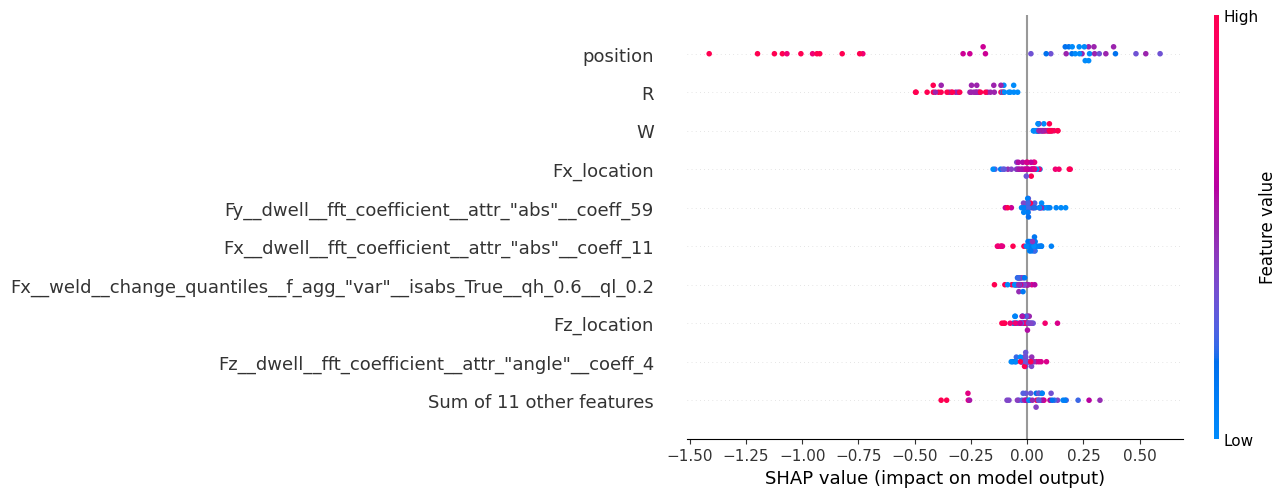

In [91]:
shap.plots.beeswarm(shap_values)

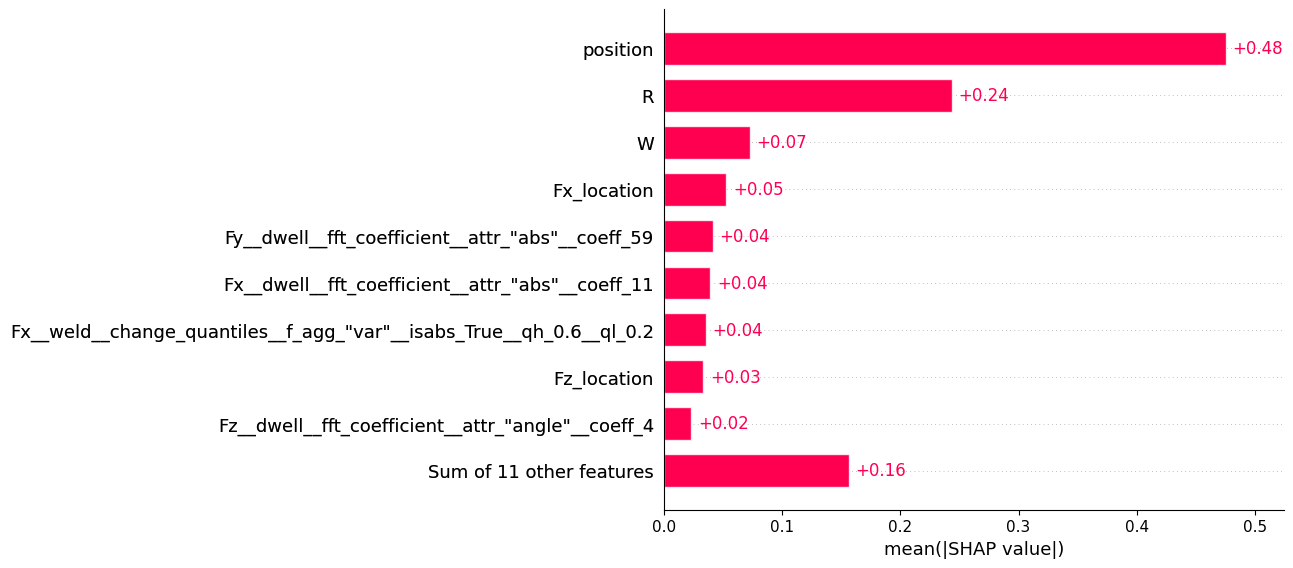

In [92]:
# Plot SHAP bar plot
shap.plots.bar(shap_values)

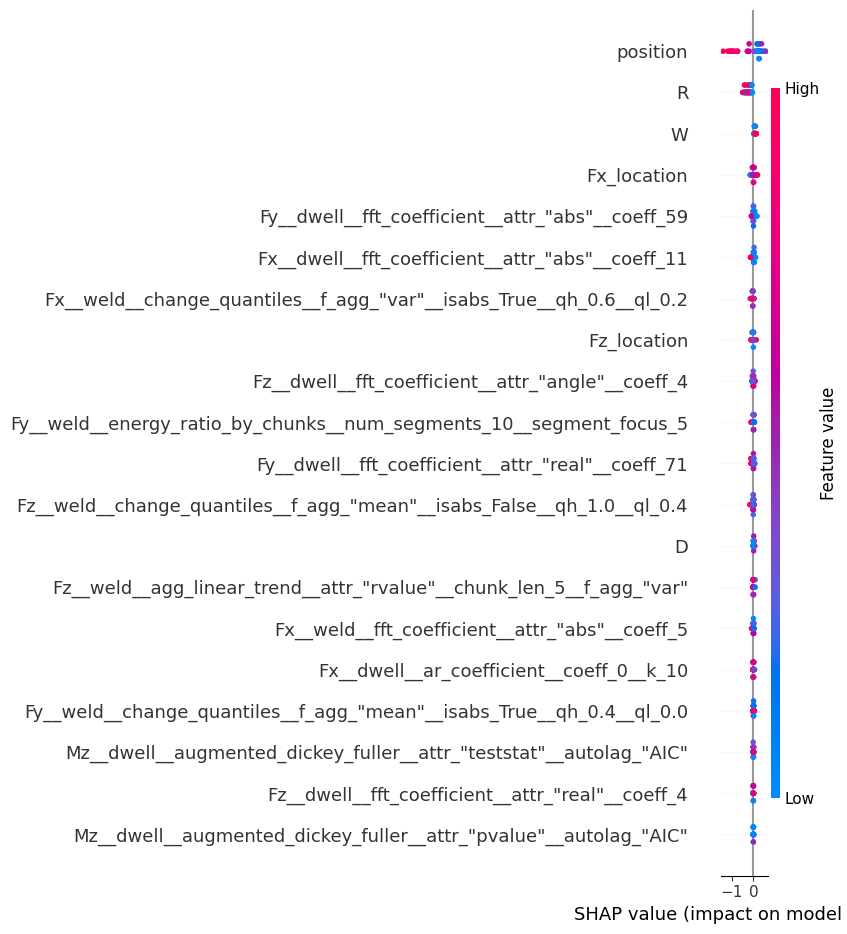

In [93]:
# Plot SHAP summary plot with feature names
shap.summary_plot(shap_values)

In [94]:
feature_names = shap_values.feature_names
shap_df = pd.DataFrame(shap_values.values, columns=feature_names)
vals = np.abs(shap_df.values).mean(0)
shap_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name', 'feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
19,position,0.475385
17,R,0.243389
18,W,0.072515
5,Fx_location,0.052853
6,"Fy__dwell__fft_coefficient__attr_""abs""__coeff_59",0.041238
2,"Fx__dwell__fft_coefficient__attr_""abs""__coeff_11",0.039287
3,"Fx__weld__change_quantiles__f_agg_""var""__isabs...",0.035683
14,Fz_location,0.033319
10,"Fz__dwell__fft_coefficient__attr_""angle""__coeff_4",0.023250
9,Fy__weld__energy_ratio_by_chunks__num_segments...,0.022106


In [95]:
ranking = shap_importance.rename(columns={"col_name": "feature", "feature_importance_vals": "value"})
ranking["measure"] = "SHAP_importance"
ranking["rank"] = np.arange(1, len(ranking) + 1)
ranking

,feature,value,measure,rank
19,position,0.475385,SHAP_importance,1
17,R,0.243389,SHAP_importance,2
18,W,0.072515,SHAP_importance,3
5,Fx_location,0.052853,SHAP_importance,4
6,"Fy__dwell__fft_coefficient__attr_""abs""__coeff_59",0.041238,SHAP_importance,5
2,"Fx__dwell__fft_coefficient__attr_""abs""__coeff_11",0.039287,SHAP_importance,6
3,"Fx__weld__change_quantiles__f_agg_""var""__isabs...",0.035683,SHAP_importance,7
14,Fz_location,0.033319,SHAP_importance,8
10,"Fz__dwell__fft_coefficient__attr_""angle""__coeff_4",0.023250,SHAP_importance,9
9,Fy__weld__energy_ratio_by_chunks__num_segments...,0.022106,SHAP_importance,10


In [96]:
ranking.to_excel("S02.xlsx", index=False)

In [97]:
# Save SHAP values in pickle
MyUtil.save_data("S02_shap_values.pkl", {"shaps": shap_values})
